## AI Project UCS415 
#### Finding Popularity of Spotify Songs
Predicting which songs will have a popularity score over 75 using Decision Tree 

Nitansh Jain  102017025

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
spotify_df = pd.read_csv('spotify_data.csv')
spotify_df.head()

,title,artist,top genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,top year,artist_type,pop
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,2010,Duo,70
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,2010,Duo,68
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,2010,Solo,72
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,2010,Solo,80
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,2010,Solo,79


In [159]:
# converting name of column top genre to genre
spotify_df = spotify_df.rename(columns={'top genre': 'genre', 'pop': 'popularity'})
spotify_df.head()

,title,artist,genre,year,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,top year,artist_type,popularity
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,2010,Duo,70
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,2010,Duo,68
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,2010,Solo,72
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,2010,Solo,80
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,2010,Solo,79


In [160]:
from sklearn import preprocessing
le_artist = preprocessing.LabelEncoder()
le_artist.fit(spotify_df['artist'])
spotify_df['artist'] = le_artist.transform(spotify_df['artist'])

le_genre = preprocessing.LabelEncoder()
le_genre.fit(spotify_df['genre'])
spotify_df['genre'] = le_genre.transform(spotify_df['genre'])

le_artist_type = preprocessing.LabelEncoder()
le_artist_type.fit(spotify_df['artist_type'])
spotify_df['artist_type'] = le_artist_type.transform(spotify_df['artist_type'])

In [161]:
# dropping added from dataset
spotify_df.drop(['added', 'title','top year'], axis=1, inplace=True)
spotify_df.head()

,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,artist_type,popularity
0,2,50,2009,140,81,61,-6,23,23,203,0,6,1,70
1,2,50,2010,138,89,68,-4,36,83,192,1,8,1,68
2,17,121,2010,95,48,84,-7,9,96,243,20,3,2,72
3,34,14,2010,93,87,66,-4,4,38,180,11,12,2,80
4,34,14,2010,104,85,69,-6,9,74,268,39,5,2,79


In [162]:
X = spotify_df.drop(['popularity'], axis=1)
Y = np.where(spotify_df['popularity'] >= 74, 1, 0)

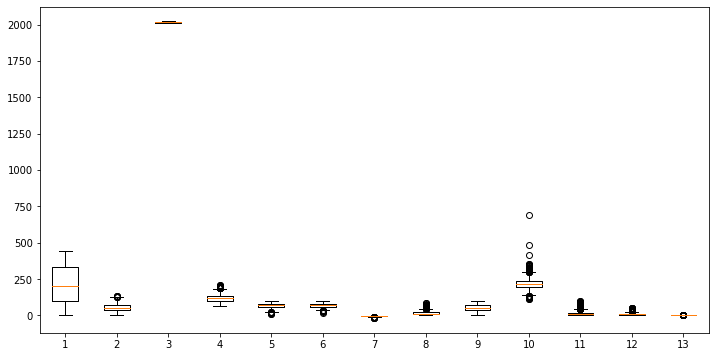

In [163]:
# Visulaizing the data before normalization
fig = plt.figure(figsize=(12,6))
plt.boxplot(X)
plt.show()

In [164]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X[0:2]

array([[-1.65, -0.23, -1.81,  0.72,  0.72, -0.45, -0.17,  0.38, -1.3 ,
        -0.44, -0.74, -0.44, -0.78],
       [-1.65, -0.23, -1.48,  0.64,  1.22,  0.08,  0.82,  1.35,  1.49,
        -0.71, -0.69, -0.22, -0.78]])

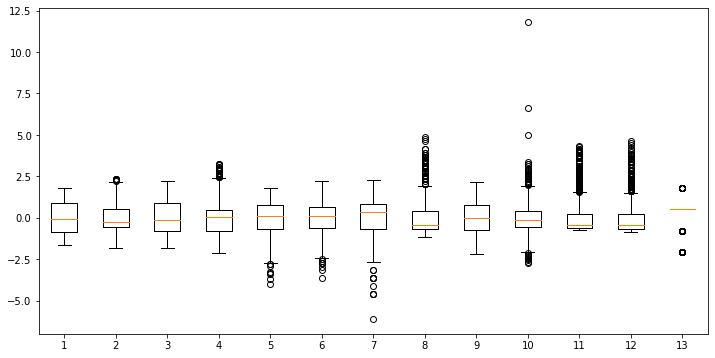

In [165]:
# after normalization of data using min_max scaler
# xticks_values = [0, 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']
# print(len(xticks_values))
fig = plt.figure(figsize=(12,6))
plt.boxplot(X)
# plt.xticks(range(0,len(xticks_values)), xticks_values)
plt.show()

<AxesSubplot:xlabel='nrgy', ylabel='popularity'>

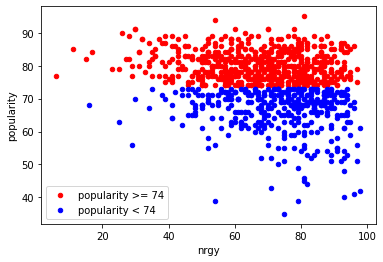

In [179]:
ax = spotify_df[spotify_df['popularity'] >= 74].plot.scatter(x='nrgy', y='popularity', c='red', label='popularity >= 74')
spotify_df[spotify_df['popularity'] < 74].plot.scatter(x='nrgy', y='popularity', c='blue', label='popularity < 74', ax=ax)

In [167]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [168]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=1, gamma=0.1)
clf.fit(x_train, y_train)

SVC(C=1, gamma=0.1)

In [169]:
yhat_spotify_pred = clf.predict(x_test)
print(yhat_spotify_pred[0:5])
print(y_test[0:5])

[1 1 1 0 1]
[1 1 0 0 1]


In [170]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [171]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.64      0.23      0.34       116
           1       0.66      0.92      0.76       184

    accuracy                           0.65       300
   macro avg       0.65      0.58      0.55       300
weighted avg       0.65      0.65      0.60       300

Confusion matrix, without normalization
[[ 27  89]
 [ 15 169]]


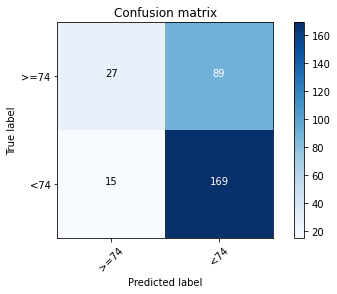

In [172]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_spotify_pred, labels=[0,1])
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat_spotify_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['>=74', '<74'],normalize= False,  title='Confusion matrix')

In [173]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat_spotify_pred, average='weighted') 

0.6011715065773144

In [174]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat_spotify_pred, pos_label=1)

0.6190476190476191